In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.preprocessing import StandardScaler

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

%matplotlib inline
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [87]:
df=df.iloc[:,1:5]
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [88]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [90]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [91]:
df.duplicated().value_counts()

False    50
dtype: int64

# Hierarchical Clutering

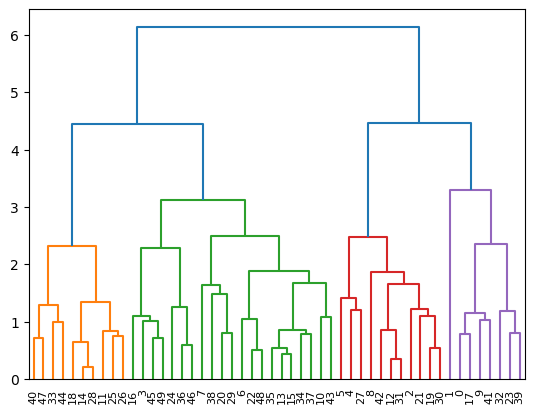

In [55]:
lk=hierarchy.linkage(x,method='complete')
drndrogram=hierarchy.dendrogram(lk)

In [60]:
ag=AgglomerativeClustering()
y=ag.fit_predict(x)
np.unique(y)

array([0, 1], dtype=int64)

In [62]:
df_hc=pd.DataFrame(x,columns=df.columns)
df_hc['Y']=y
df_hc

,Murder,Assault,UrbanPop,Rape,Y
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,1
2,0.072361,1.493817,1.009122,1.053466,1
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,1
5,0.025976,0.402909,0.869548,1.883901,1
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,1
9,2.229265,0.487757,-0.386621,0.492653,1


In [63]:
df_hc.groupby('Y').agg('mean')

,Murder,Assault,UrbanPop,Rape
Y,,,,
0,-0.645859,-0.657892,-0.118728,-0.527735
1,1.053771,1.073403,0.193714,0.861041


In [65]:
df_hc['Y'].value_counts()

0    31
1    19
Name: Y, dtype: int64

<AxesSubplot:xlabel='Y', ylabel='Murder'>

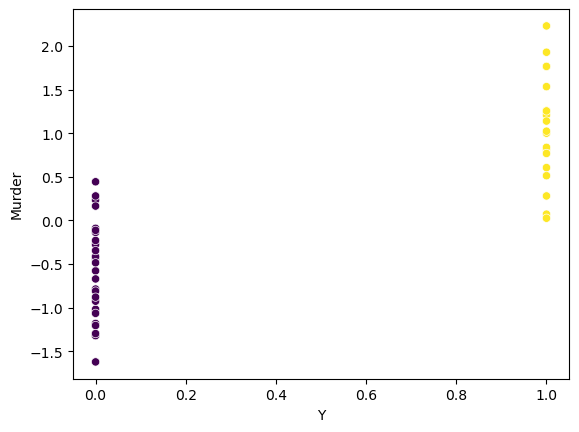

In [74]:
sns.scatterplot(df_hc['Y'],df_hc['Murder'],c=df_hc['Y'])

# KMeans Clustering

In [78]:
km=KMeans()
y=km.fit_predict(x)
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [79]:
km.cluster_centers_

array([[-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 1.35722637,  0.50472681, -0.20517423,  0.39127514],
       [-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-0.23125052, -0.30342672, -0.27242367, -0.23973789],
       [ 1.55668205,  1.46553402, -1.38690338, -0.28745278],
       [ 0.87540173,  1.22260495,  0.83465436,  0.85799046],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [101]:
df_km=pd.DataFrame(x,columns=df.columns)
df_km['Y']=y
df_km

,Murder,Assault,UrbanPop,Rape,Y
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,7
2,0.072361,1.493817,1.009122,1.053466,6
3,0.234708,0.233212,-1.084492,-0.186794,4
4,0.281093,1.275635,1.776781,2.088814,3
5,0.025976,0.402909,0.869548,1.883901,3
6,-1.040880,-0.736484,0.799761,-1.092723,2
7,-0.437875,0.815030,0.450825,-0.585834,4
8,1.765415,1.990786,1.009122,1.150530,6
9,2.229265,0.487757,-0.386621,0.492653,1


In [99]:
df_km['Y'].value_counts()

4    11
0    10
2     9
6     8
1     5
3     3
5     3
7     1
Name: Y, dtype: int64

<AxesSubplot:xlabel='Y', ylabel='Murder'>

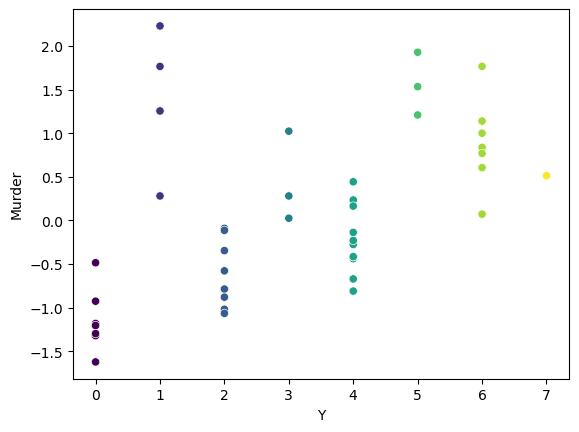

In [103]:
sns.scatterplot(df_km['Y'],df_km['Murder'],c=df_km['Y'])

# Elbow Graph

In [107]:
wcss=[]
for i in range(1,20):
    km=KMeans(n_clusters=i)
    y=km.fit_predict(x)
    wcss.append(km.inertia_)
    
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.66757825000804,
 50.08743315681842,
 45.407248363864596,
 40.83219023213375,
 34.56029010573872,
 32.03060332882457,
 27.53743443580577,
 24.595585392111914,
 22.106280400238887,
 20.85037970196001,
 19.81529818146624,
 17.923016456033263,
 17.28369838910856,
 15.804813324542678,
 14.427344828639377,
 13.486101000256905]

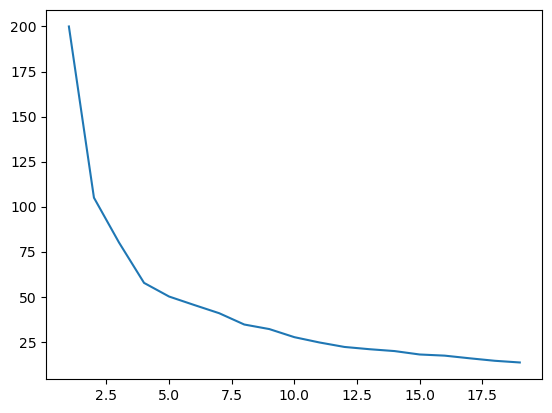

In [108]:
plt.plot(range(1,20),wcss)
#plt.plot()

In [110]:
km=KMeans(n_clusters=4)
y=km.fit_predict(x)
y

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2])

In [111]:
df_km['Y']=y
df_km

,Murder,Assault,UrbanPop,Rape,Y
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,3
2,0.072361,1.493817,1.009122,1.053466,3
3,0.234708,0.233212,-1.084492,-0.186794,1
4,0.281093,1.275635,1.776781,2.088814,3
5,0.025976,0.402909,0.869548,1.883901,3
6,-1.040880,-0.736484,0.799761,-1.092723,2
7,-0.437875,0.815030,0.450825,-0.585834,2
8,1.765415,1.990786,1.009122,1.150530,3
9,2.229265,0.487757,-0.386621,0.492653,1


<AxesSubplot:xlabel='Y', ylabel='Murder'>

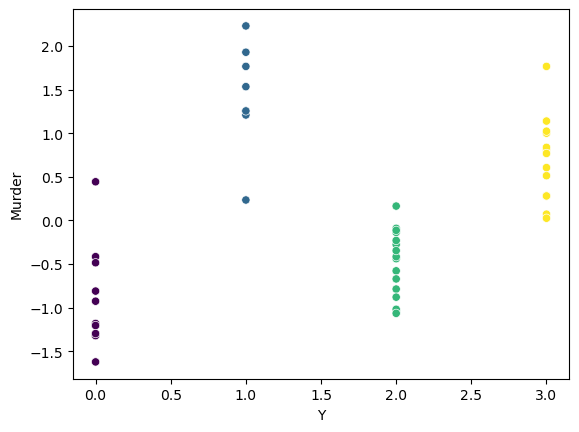

In [116]:
sns.scatterplot(df_km['Y'],df_km['Murder'],c=df_km['Y'])

In [117]:
df_km.groupby('Y').agg('mean')

,Murder,Assault,UrbanPop,Rape
Y,,,,
0,-0.971303,-1.117836,-0.939550,-0.976578
1,1.426224,0.883211,-0.822791,0.019467
2,-0.494407,-0.386484,0.581676,-0.264310
3,0.702127,1.049994,0.729974,1.289904


# DBScan Cluster

In [119]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [120]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

{'whiskers': [<matplotlib.lines.Line2D at 0x184100a7700>,
 'caps': [<matplotlib.lines.Line2D at 0x1840fd0c910>,
 'boxes': [<matplotlib.lines.Line2D at 0x184100a70a0>,
 'medians': [<matplotlib.lines.Line2D at 0x184107a12e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x184107a1580>,
 'means': []}

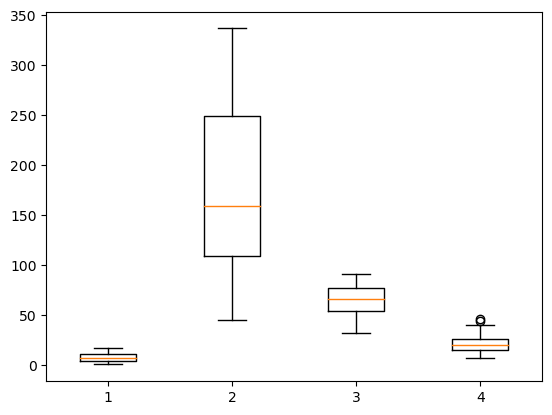

In [121]:
plt.boxplot(df)

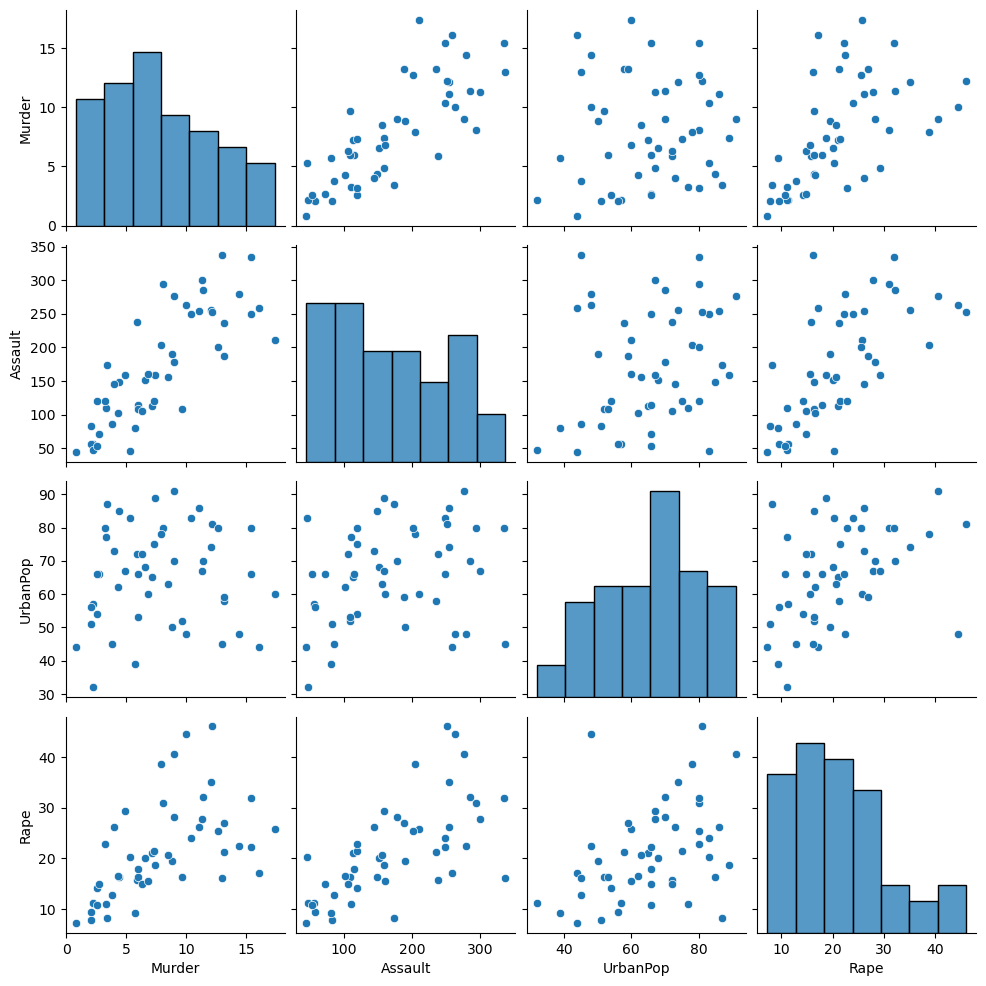

In [122]:
sns.pairplot(df)

In [195]:
db=DBSCAN(eps=1.1,min_samples=5)
db.fit(x)
db.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [196]:
silhouette_score(x,db.labels_)

0.3907373331499921